# Compiling the different versions of Micro-Aevol 2

In [9]:
import os
import subprocess

KOKKOS_LIB_CMAKE = "Kokkos_DIR={0}/lib/cmake/Kokkos".format(os.environ.get("KOKKOS_INSTALL_DIR"))
print(KOKKOS_LIB_CMAKE)

EXE_NAME = "micro_aevol_kokkos"

Kokkos_DIR=/home/onyr/Kokkos/kokkos_install/lib/cmake/Kokkos


In [10]:
# parameters
experiment_params = {
    "dna_sizes": [100, 250], # size of DNA
    "mutation_rates": [0.000001, 0.00001], # mutation rate
    "world_sizes": [32, 64], # size of the world
}

# get project names from dirs in ./aevols directory
project_names = [d for d in os.listdir("./aevols") if os.path.isdir(os.path.join("./aevols", d))]
project_names.sort()
print(project_names)
nb_host_threads = 14

['aevol_0', 'aevol_1', 'aevol_2', 'aevol_3', 'aevol_4', 'aevol_5', 'aevol_6', 'aevol_kokkos_gpu_broken']


### Prepare tracing

In [11]:
csv_result_file = "stats.csv"
csv_headers = {
    'world_size_width': int,
    'world_size_height': int,
    'dna_size': int,
    'mutation_rate': float,
    'nb_generations': int,
    'runtime' : float
}

repeats = 5

In [12]:
import os
import subprocess

def create_csv_file(dirpath: str):
    filepath = dirpath + csv_result_file
    print(f"Creating NEW CSV file ({filepath})")
    f = open(filepath, "w")
    f.write(",".join(csv_headers.keys()) + "\n")
    f.close()

def clean_and_mkdir(dirpath: str):
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)
    else:
        print(f"{dirpath} directory already exists")
        print(f"removing previous {dirpath} directory")
        subprocess.run(["rm", "-rf", dirpath])
        os.makedirs(dirpath)

### ⚠ Danger zone ⚠

In [116]:
# clean, create dir and create csv file
for project_name in project_names:
    # create csv file
    stats_dir = "./aevols/" + project_name + "/stats/"
    clean_and_mkdir(stats_dir)
    create_csv_file(stats_dir)

./aevols/aevol_0/stats/ directory already exists
removing previous ./aevols/aevol_0/stats/ directory
Creating NEW CSV file (./aevols/aevol_0/stats/stats.csv)
./aevols/aevol_1/stats/ directory already exists
removing previous ./aevols/aevol_1/stats/ directory
Creating NEW CSV file (./aevols/aevol_1/stats/stats.csv)
./aevols/aevol_2/stats/ directory already exists
removing previous ./aevols/aevol_2/stats/ directory
Creating NEW CSV file (./aevols/aevol_2/stats/stats.csv)
./aevols/aevol_3/stats/ directory already exists
removing previous ./aevols/aevol_3/stats/ directory
Creating NEW CSV file (./aevols/aevol_3/stats/stats.csv)
./aevols/aevol_4/stats/ directory already exists
removing previous ./aevols/aevol_4/stats/ directory
Creating NEW CSV file (./aevols/aevol_4/stats/stats.csv)
./aevols/aevol_5/stats/ directory already exists
removing previous ./aevols/aevol_5/stats/ directory
Creating NEW CSV file (./aevols/aevol_5/stats/stats.csv)


In [81]:
# erase previous build
for project_name in project_names:
    build_dir = "./aevols/" + project_name + "/build/"
    if os.path.exists(build_dir):
        print(f"removing previous {build_dir} directory")
        subprocess.run(["rm", "-rf", build_dir])

removing previous ./aevols/aevol_0/build/ directory
removing previous ./aevols/aevol_1/build/ directory
removing previous ./aevols/aevol_2/build/ directory
removing previous ./aevols/aevol_3/build/ directory
removing previous ./aevols/aevol_4/build/ directory


## Compiling & Run executables

In [18]:
# compile
project_names =['aevol_6']
for project_name in project_names:
    build_dir = "./aevols/" + project_name + "/build/"

    # check if build/Makefile exists
    if not os.path.exists(build_dir + "Makefile"):
        clean_and_mkdir(build_dir)
        print(f"Creating new Makefile in {build_dir}")
    
        # run cmake to generate makefiles
        #subprocess.run(["cmake", "-B", f"./aevols/{project_name}/build", "-S", f"./aevols/{project_name}", "-D", KOKKOS_LIB_CMAKE, "-DCMAKE_BUILD_TYPE=Debug"])
        subprocess.run(["cmake", "-B", f"./aevols/{project_name}/build", "-S", f"./aevols/{project_name}", "-D", KOKKOS_LIB_CMAKE, "-DCMAKE_BUILD_TYPE=Release"])


    # run make to compile
    subprocess.run(["make", "-C", f"./aevols/{project_name}/build"])

make: Entering directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_6/build'
make[1]: Entering directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_6/build'
make[2]: Entering directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_6/build'
Consolidate compiler generated dependencies of target micro_aevol
make[2]: Leaving directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_6/build'
make[2]: Entering directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_6/build'
[  8%] Building CXX object CMakeFiles/micro_aevol.dir/Abstract_ExpManager.cpp.o
[ 16%] Building CXX object CMakeFiles/micro_aevol.dir/ExpManager.cpp.o
[ 25%] Building CXX object CMakeFiles/micro_aevol.dir/DnaMutator.cpp.o
[ 33%] Building CXX object CMakeFiles/micro_aevol.dir/Organism.cpp.o
make[2]: Leaving directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_6/build'
make[1]: Leaving directory '/home/onyr/Documents/code/OT5_mi

/home/onyr/Kokkos/kokkos_install/include/Cuda/Kokkos_Cuda_Parallel_Range.hpp(86): error: calling a __host__ function("Organism::compute_phenotype()::[lambda(int) (instance 1)]::operator ()(int) const") from a __device__ function("Kokkos::Impl::ParallelFor< ::Organism::compute_phenotype()   ::[lambda(int) (instance 1)],  ::Kokkos::RangePolicy< ::Kokkos::Cuda > ,  ::Kokkos::Cuda> ::exec_range<void>  const") is not allowed

/home/onyr/Kokkos/kokkos_install/include/Cuda/Kokkos_Cuda_Parallel_Range.hpp(86): error: identifier "Organism::compute_phenotype()::[lambda(int) (instance 1)]::operator () const" is undefined in device code

/home/onyr/Kokkos/kokkos_install/include/Cuda/Kokkos_Cuda_Parallel_Range.hpp(86): error: calling a __host__ function("Organism::compute_phenotype()::[lambda(int) (instance 2)]::operator ()(int) const") from a __device__ function("Kokkos::Impl::ParallelFor< ::Organism::compute_phenotype()   ::[lambda(int) (instance 2)],  ::Kokkos::RangePolicy< ::Kokkos::Cuda > ,  ::

In [9]:
# execute
run_once = False
#project_names = ['aevol_4'] # select just one
NB_REPEAT = 1
for project_name in project_names:
    for dna_size in experiment_params["dna_sizes"]:
        for mutation_rate in experiment_params["mutation_rates"]:
            for world_size in experiment_params["world_sizes"]:
                for _ in range(NB_REPEAT):
                    print("Running {} with dna_size={}, mutation_rate={}, world_size={}".format(project_name, dna_size, mutation_rate, world_size))
                    
                    # prepare arguments
                    current_dir = os.getcwd()
                    program_filepath = current_dir + "/aevols/" + project_name + "/build/" + EXE_NAME
                    args = (program_filepath, 
                        "-w", str(world_size), 
                        "-h", str(world_size),
                        "-g", str(dna_size),
                        "-m", str(mutation_rate),
                    )
                    if project_name == "aevol_4" or project_name == "aevol_5":
                        args += ("-t", str(nb_host_threads),)

                    # run the executable
                    popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                    popen.wait()

                    # run once only
                    if run_once:
                        break
                if run_once:
                    break
            if run_once:
                break
        if run_once:
            break
    if run_once:
        break

Running aevol_6 with dna_size=100, mutation_rate=1e-06, world_size=32


Constructor for Kokkos View 'best fitness' has mismatched number of arguments. Number of arguments = 1 but dynamic rank = 0 

Backtrace:
                  [0x56523b2fae19]
                  [0x56523b2ede5e]
                  [0x56523b2ede8f]
                  [0x56523b2c2c05]
                  [0x56523b2c588a]
                  [0x56523b2bc581]
                  [0x56523b2b43a6]
                  [0x7f97d57d7d90]
__libc_start_main [0x7f97d57d7e40]
                  [0x56523b2b6e05]


Running aevol_6 with dna_size=100, mutation_rate=1e-06, world_size=64


Constructor for Kokkos View 'best fitness' has mismatched number of arguments. Number of arguments = 1 but dynamic rank = 0 

Backtrace:
                  [0x55d1b0421e19]
                  [0x55d1b0414e5e]
                  [0x55d1b0414e8f]
                  [0x55d1b03e9c05]
                  [0x55d1b03ec88a]
                  [0x55d1b03e3581]
                  [0x55d1b03db3a6]
                  [0x7fac91af0d90]
__libc_start_main [0x7fac91af0e40]
                  [0x55d1b03dde05]


Running aevol_6 with dna_size=100, mutation_rate=1e-05, world_size=32


Constructor for Kokkos View 'best fitness' has mismatched number of arguments. Number of arguments = 1 but dynamic rank = 0 

Backtrace:
                  [0x55b0156abe19]
                  [0x55b01569ee5e]
                  [0x55b01569ee8f]
                  [0x55b015673c05]
                  [0x55b01567688a]
                  [0x55b01566d581]
                  [0x55b0156653a6]
                  [0x7f3978cf0d90]
__libc_start_main [0x7f3978cf0e40]
                  [0x55b015667e05]


Running aevol_6 with dna_size=100, mutation_rate=1e-05, world_size=64


Constructor for Kokkos View 'best fitness' has mismatched number of arguments. Number of arguments = 1 but dynamic rank = 0 

Backtrace:
                  [0x55b80423ce19]
                  [0x55b80422fe5e]
                  [0x55b80422fe8f]
                  [0x55b804204c05]
                  [0x55b80420788a]
                  [0x55b8041fe581]
                  [0x55b8041f63a6]
                  [0x7f0fbdef0d90]
__libc_start_main [0x7f0fbdef0e40]
                  [0x55b8041f8e05]


Running aevol_6 with dna_size=250, mutation_rate=1e-06, world_size=32


Constructor for Kokkos View 'best fitness' has mismatched number of arguments. Number of arguments = 1 but dynamic rank = 0 

Backtrace:
                  [0x564a30b1ee19]
                  [0x564a30b11e5e]
                  [0x564a30b11e8f]
                  [0x564a30ae6c05]
                  [0x564a30ae988a]
                  [0x564a30ae0581]
                  [0x564a30ad83a6]
                  [0x7f1023b8dd90]
__libc_start_main [0x7f1023b8de40]
                  [0x564a30adae05]


Running aevol_6 with dna_size=250, mutation_rate=1e-06, world_size=64


Constructor for Kokkos View 'best fitness' has mismatched number of arguments. Number of arguments = 1 but dynamic rank = 0 

Backtrace:
                  [0x562a197dce19]
                  [0x562a197cfe5e]
                  [0x562a197cfe8f]
                  [0x562a197a4c05]
                  [0x562a197a788a]
                  [0x562a1979e581]
                  [0x562a197963a6]
                  [0x7fc2e52a6d90]
__libc_start_main [0x7fc2e52a6e40]
                  [0x562a19798e05]


Running aevol_6 with dna_size=250, mutation_rate=1e-05, world_size=32


Constructor for Kokkos View 'best fitness' has mismatched number of arguments. Number of arguments = 1 but dynamic rank = 0 

Backtrace:
                  [0x55fef33ece19]
                  [0x55fef33dfe5e]
                  [0x55fef33dfe8f]
                  [0x55fef33b4c05]
                  [0x55fef33b788a]
                  [0x55fef33ae581]
                  [0x55fef33a63a6]
                  [0x7f1ff51d7d90]
__libc_start_main [0x7f1ff51d7e40]
                  [0x55fef33a8e05]


Running aevol_6 with dna_size=250, mutation_rate=1e-05, world_size=64


Constructor for Kokkos View 'best fitness' has mismatched number of arguments. Number of arguments = 1 but dynamic rank = 0 

Backtrace:
                  [0x558e270f0e19]
                  [0x558e270e3e5e]
                  [0x558e270e3e8f]
                  [0x558e270b8c05]
                  [0x558e270bb88a]
                  [0x558e270b2581]
                  [0x558e270aa3a6]
                  [0x7f30433d7d90]
__libc_start_main [0x7f30433d7e40]
                  [0x558e270ace05]


# Graphs & Analysis

In [7]:
project_names= ['aevol_0', 'aevol_1', 'aevol_2', 'aevol_3', 'aevol_4', 'aevol_5', 'aevol_6']
print(project_names)

['aevol_0', 'aevol_1', 'aevol_2', 'aevol_3', 'aevol_4', 'aevol_5']


In [9]:
# get the data from aevol/*/stats/stats.csv
import pandas as pd
from IPython.display import display

df = pd.DataFrame()
for project_name in project_names:
    stats_dir = "./aevols/" + project_name + "/stats/"

    # add a version column with project_name
    df_stats = pd.read_csv(stats_dir + csv_result_file)
    df_stats["version"] = project_name

    # append to data
    df = df.append(df_stats, ignore_index=True)

display(df)
print(df.shape)
print(df["version"].unique())
print(df["mutation_rate"].unique())

/tmp/ipykernel_43510/1363348757.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_stats, ignore_index=True)
/tmp/ipykernel_43510/1363348757.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_stats, ignore_index=True)
/tmp/ipykernel_43510/1363348757.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_stats, ignore_index=True)
/tmp/ipykernel_43510/1363348757.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_stats, ignore_index=True)
/tmp/ipykernel_43510/1363348757.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

,world_size_width,world_size_height,dna_size,mutation_rate,nb_generations,runtime,version


(0, 7)
[]
[]


{'aevol_0': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725), 'aevol_1': (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), 'aevol_2': (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), 'aevol_3': (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), 'aevol_4': (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), 'aevol_5': (0.5764705882352941, 0.47058823529411764, 0.3764705882352941), 'aevol_6': (0.8549019607843137, 0.5450980392156862, 0.7647058823529411)}


/tmp/ipykernel_43510/4266766203.py:49: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g0 = sns.lineplot(


ValueError: Axis limits cannot be NaN or Inf

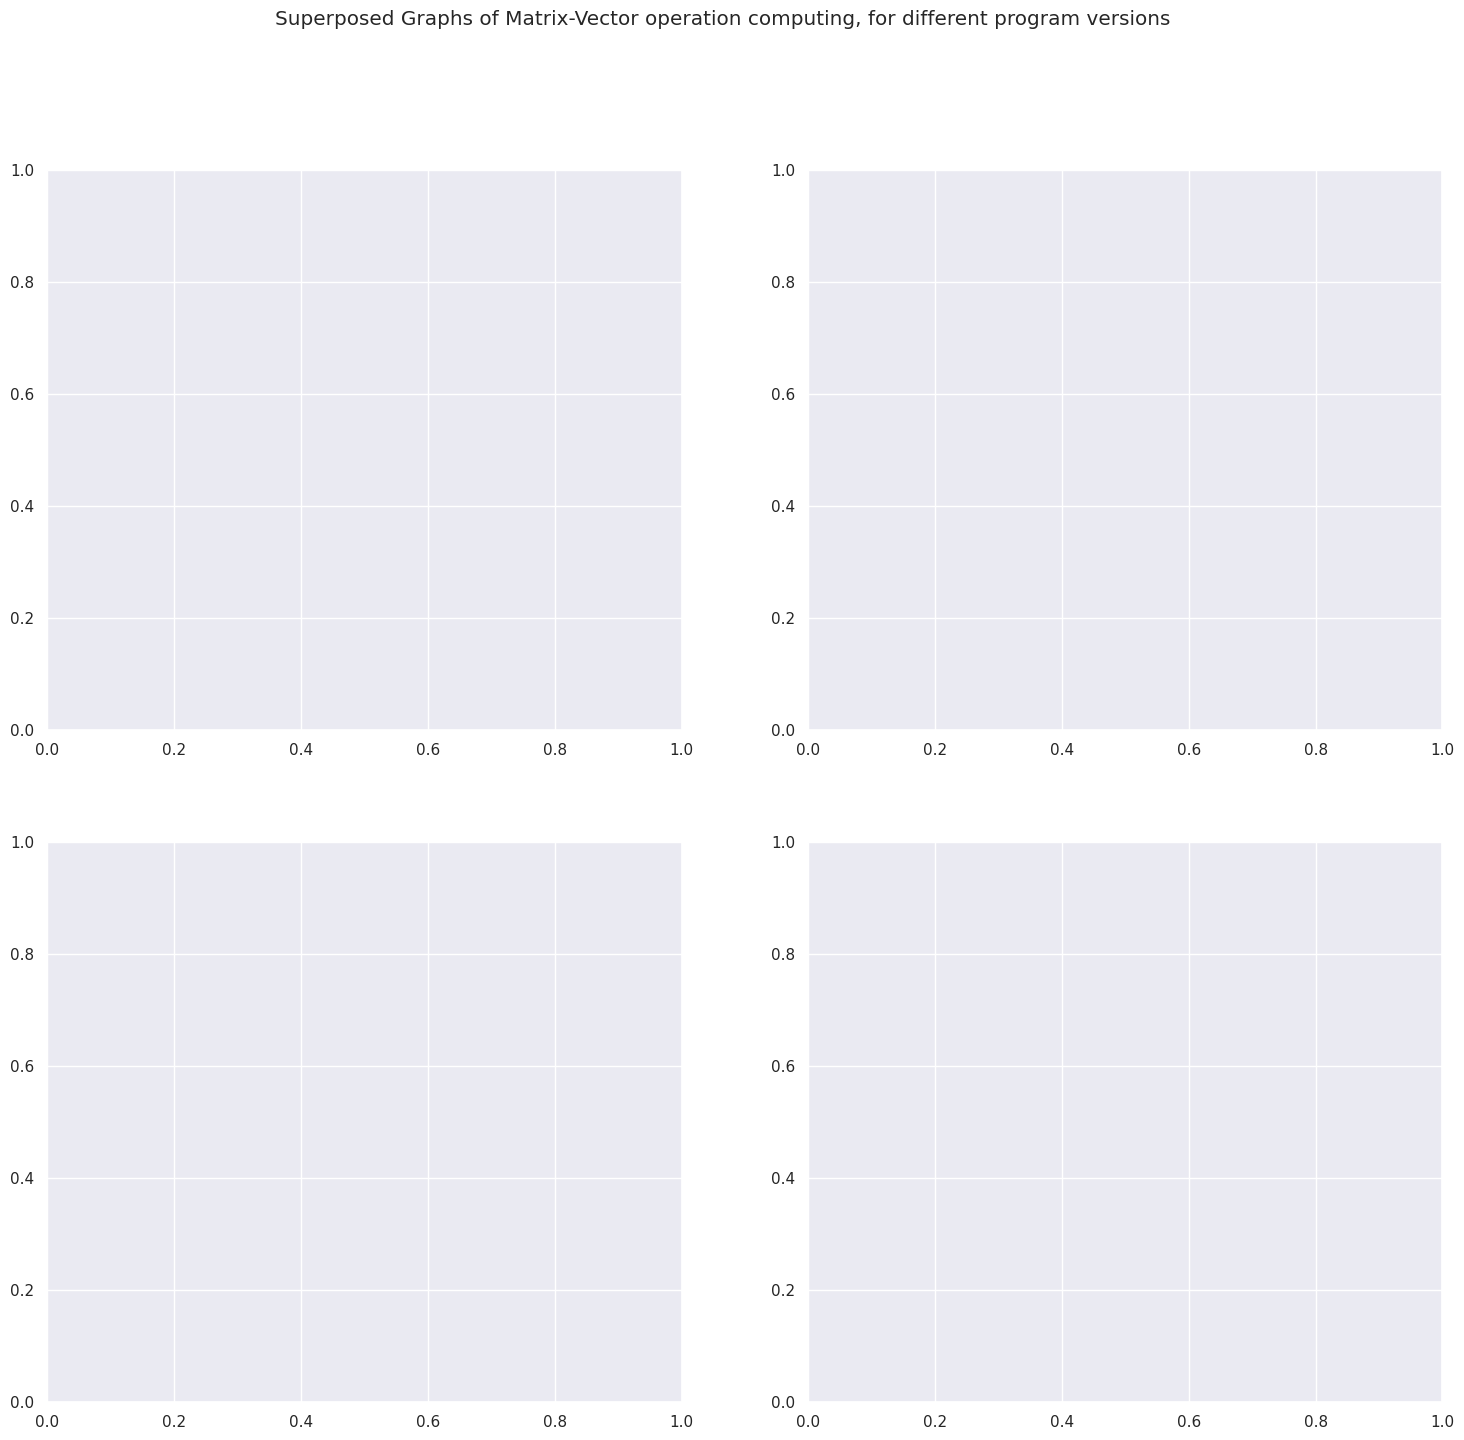

In [10]:
# plot the data
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from numpy import genfromtxt
import itertools
import pandas as pd
import seaborn as sns

sns.set()

# filter out 0 runtime values
df = df[df.runtime > 0]

# create a palette for every version
palette = itertools.cycle(sns.color_palette(
    n_colors=len(project_names),
))
version_palette = {}
for project_name in project_names:
    version_palette[project_name] = next(palette)
print(version_palette)


# display the graph
def display_graph(df: pd.DataFrame):
    COLUMNS = len(experiment_params["mutation_rates"])
    ROWS = len(experiment_params["dna_sizes"])

    # display graphs
    fig, ax = plt.subplots(ROWS, COLUMNS, figsize=(18,16))
    fig.suptitle("Superposed Graphs of Matrix-Vector operation computing, for different program versions")

    for i in range(ROWS):
        dna_size = experiment_params["dna_sizes"][i]

        for j in range(COLUMNS):
            mutation_rate = experiment_params["mutation_rates"][j]

            for k in range(0, len(version_palette.keys())):
                # print version graph data
                graph_version = list(version_palette.keys())[k]
                
                # filter out data
                df_plot_0 = df[df['version'] == graph_version]
                df_plot_1 = df_plot_0[df_plot_0['dna_size'] == dna_size]
                df_plot_2 = df_plot_1[df_plot_1['mutation_rate'] == mutation_rate]
                
                g0 = sns.lineplot(
                    ax=ax[i][j],
                    data=df_plot_2, 
                    x="world_size_width",
                    y="runtime", 
                    hue="version",
                    palette=version_palette,
                    style="version",
                )
                g0.set(ylim=(df.runtime.min(), df.runtime.max()))
                g0.set(yscale="log")
                g0.set(title=f"dna_size={dna_size}, mutation_rate={mutation_rate}")
                g0.set(xlabel="World size", ylabel="runtime (s)")
                g00 = sns.scatterplot(
                    ax=ax[i][j],
                    data=df_plot_2, 
                    x="world_size_width",
                    y="runtime", 
                    hue="version",
                    palette=version_palette,
                    legend=False,
                )
                g00.set(ylim=(df.runtime.min(), df.runtime.max()))
                g00.set(yscale="log")
        
    plt.show()


display_graph(df)

#### Aevol 1 optimization: bitset
The bitset optimisation is useful when the mutation rate increases. This is because it optimizes the copies and data handling. However, a simple vector is still better for small values of the params.

We discovered it is almost not worth it to parallelize the initial search for a fitting organism.